In [11]:
import glob
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

dir = "/ifs/scratch/jls106_gp/nhw2114/data/20231106_synthetic_data"

eakf_metrics_df = pd.read_csv(dir + '/eakf_metrics_all.csv')
epiestim_metrics_df = pd.read_csv(dir + '/epiEstim_metrics_all.csv')
eakf_metrics_badinciks_df = pd.read_csv("/ifs/scratch/jls106_gp/nhw2114/data/20231106_synthetic_data/eakf_metrics_badinciks_all.csv")
esrs_metrics_df = pd.read_csv("/ifs/scratch/jls106_gp/nhw2114/data/20231106_synthetic_data/esrs_metrics_all.csv")

In [12]:
# dir = "/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data"
# files = glob.glob(dir + '/*esrs_metrics*.csv')
# print(len(files))

In [13]:
# df_list = []

# for f in files:
#     param_num = os.path.basename(f).split("_")[0]
#     df = pd.read_csv(f)
#     df["param"] = int(param_num)
#     df_list.append(df)
    
# combined_df = pd.concat(df_list, ignore_index=True)
# combined_df.head()
# combined_df.to_csv("/ifs/scratch/jls106_gp/nhw2114/data/20231106_synthetic_data/esrs_metrics_all.csv", index=False)

In [16]:
# eakf_metrics_df[["method", 'rt_peak_rmse', 'rt_rmse', 'data_rmse', 'avg_w2', 'avg_kl',
#                  'in_ci', 'ens_var', 'in_ci_last_day', 'ens_var_last_day']].groupby("method").mean().round(4)

In [17]:
eakf_metrics_badinciks_df[['method', 'rt_peak_rmse', 'rt_rmse', 'rt_last_epi_day_rmse',
       'data_rmse', 'data_rmse_last_epi_day', 'avg_w2', 'avg_kl',
       'avg_w2_last_epi_day', 'avg_kl_last_epi_day', 'in_ci', 'ens_var',
       'in_ci_last_day', 'ens_var_last_day', 'in_ci_last_epi_day',
       'ens_var_last_epi_day']].groupby('method').mean().round(4)

,rt_peak_rmse,rt_rmse,rt_last_epi_day_rmse,data_rmse,data_rmse_last_epi_day,avg_w2,avg_kl,avg_w2_last_epi_day,avg_kl_last_epi_day,in_ci,ens_var,in_ci_last_day,ens_var_last_day,in_ci_last_epi_day,ens_var_last_epi_day
method,,,,,,,,,,,,,,,
adaptive inflation,0.0848,0.3743,0.3787,47.1564,34.4150,0.6422,0.9526,0.6553,0.9639,0.6625,0.3061,0.9743,0.3317,0.8373,0.1523
fixed inflation,0.0441,0.5994,0.5095,68.9361,34.4150,0.8112,3.3069,0.8183,3.2887,0.1728,0.0844,0.4320,0.0165,0.4634,0.0339
no inflation,0.0247,1.7630,0.9985,117.3199,34.4150,0.9889,7.1591,0.9809,6.6292,0.0000,0.0001,0.0000,0.0001,0.0244,0.0001
smooth inflation,0.0436,0.2534,0.1727,58.5005,32.3955,0.3840,0.9686,0.3861,1.0237,0.0006,0.0729,0.0017,0.3073,0.0006,0.0927


In [19]:
esrs_metrics_df[['method', 'in_ci', 'ens_var', 'in_ci_last_day', 'ens_var_last_day',
       'in_ci_last_epi_day', 'ens_var_last_epi_day']].groupby('method').mean().round(4)

,in_ci,ens_var,in_ci_last_day,ens_var_last_day,in_ci_last_epi_day,ens_var_last_epi_day
method,,,,,,
adaptive inflation,0.6626,0.3057,0.9742,0.3315,0.8373,0.1522
smooth inflation,0.5435,0.0728,0.9715,0.3070,0.8350,0.0926


In [15]:
epiestim_metrics_df[['window', 'rt_peak_rmse', 'rt_rmse', 'rt_last_epi_day_rmse',
       'data_rmse', 'data_rmse_last_epi_day', 'avg_w2', 'avg_kl',
       'avg_w2_last_epi_day', 'avg_kl_last_epi_day', 'in_ci', 'ens_var',
       'in_ci_last_day', 'ens_var_last_day', 'in_ci_last_epi_day',
       'ens_var_last_epi_day']].groupby('window').mean(numeric_only=False).round(4)

,rt_peak_rmse,rt_rmse,rt_last_epi_day_rmse,data_rmse,data_rmse_last_epi_day,avg_w2,avg_kl,avg_w2_last_epi_day,avg_kl_last_epi_day,in_ci,ens_var,in_ci_last_day,ens_var_last_day,in_ci_last_epi_day,ens_var_last_epi_day
window,,,,,,,,,,,,,,,
1,0.4613,23.9354,0.9311,254.0693,192.5962,0.4916,1.7044,0.4965,1.7558,0.5937,0.8249,0.8083,813.7261,0.9428,5.4492
2,0.2869,17.1644,0.6541,211.7436,192.1215,0.3943,1.2914,0.3970,1.3468,0.5942,0.3486,0.7486,421.7227,0.8757,3.2275
3,0.2161,13.6657,0.5476,196.8009,199.3396,0.3638,1.2028,0.3637,1.2673,0.6028,0.2050,0.7458,230.0069,0.8465,2.3367
4,0.2097,11.5230,0.4926,203.9543,222.4373,0.4056,1.4594,0.4031,1.5390,0.5887,0.1392,0.7437,149.8501,0.8446,1.8803
5,0.2467,10.0959,0.4639,228.5205,259.6468,0.4977,2.1200,0.4932,2.2204,0.5632,0.1016,0.6617,142.6860,0.8384,1.6133
6,0.3012,9.0735,0.4500,262.3707,303.8726,0.5993,3.0950,0.5935,3.2180,0.5334,0.0781,0.6710,98.0766,0.8444,1.4612
7,0.3611,8.3233,0.4439,299.2819,349.1899,0.6912,4.2164,0.6849,4.3584,0.5016,0.0617,0.6839,73.6501,0.8500,1.3432
8,0.4201,7.7664,0.4433,337.0969,394.2428,0.7714,5.3591,0.7657,5.5066,0.4732,0.0501,0.6649,66.3890,0.8516,1.2602
9,0.4749,7.3393,0.4476,373.7531,437.4348,0.8404,6.4444,0.8362,6.5817,0.4447,0.0413,0.6007,58.7196,0.8511,1.2027


# Compute correlations with params

In [27]:
param_df = pd.read_csv("param_list.csv")
param_df["param"] = param_df.index

In [28]:
eakf_metrics_badinciks_df = eakf_metrics_badinciks_df.merge(param_df, on="param")
esrs_metrics_df = esrs_metrics_df.merge(param_df, on="param")
epiestim_metrics_df = epiestim_metrics_df.merge(param_df, on="param")

In [45]:
eakf_metrics_badinciks_df.select_dtypes(['number']).corr().stack()[['rt_0', 'rt_1', 'midpoint', 'k']]

rt_0  rt_peak_rmse              0.091666
      rt_rmse                   0.156680
      rt_last_epi_day_rmse      0.248160
      data_rmse                -0.247910
      data_rmse_last_epi_day    0.405231
                                  ...   
k     param                     0.018018
      rt_0                      0.033051
      rt_1                     -0.016732
      midpoint                 -0.112602
      k                         1.000000
Length: 80, dtype: float64

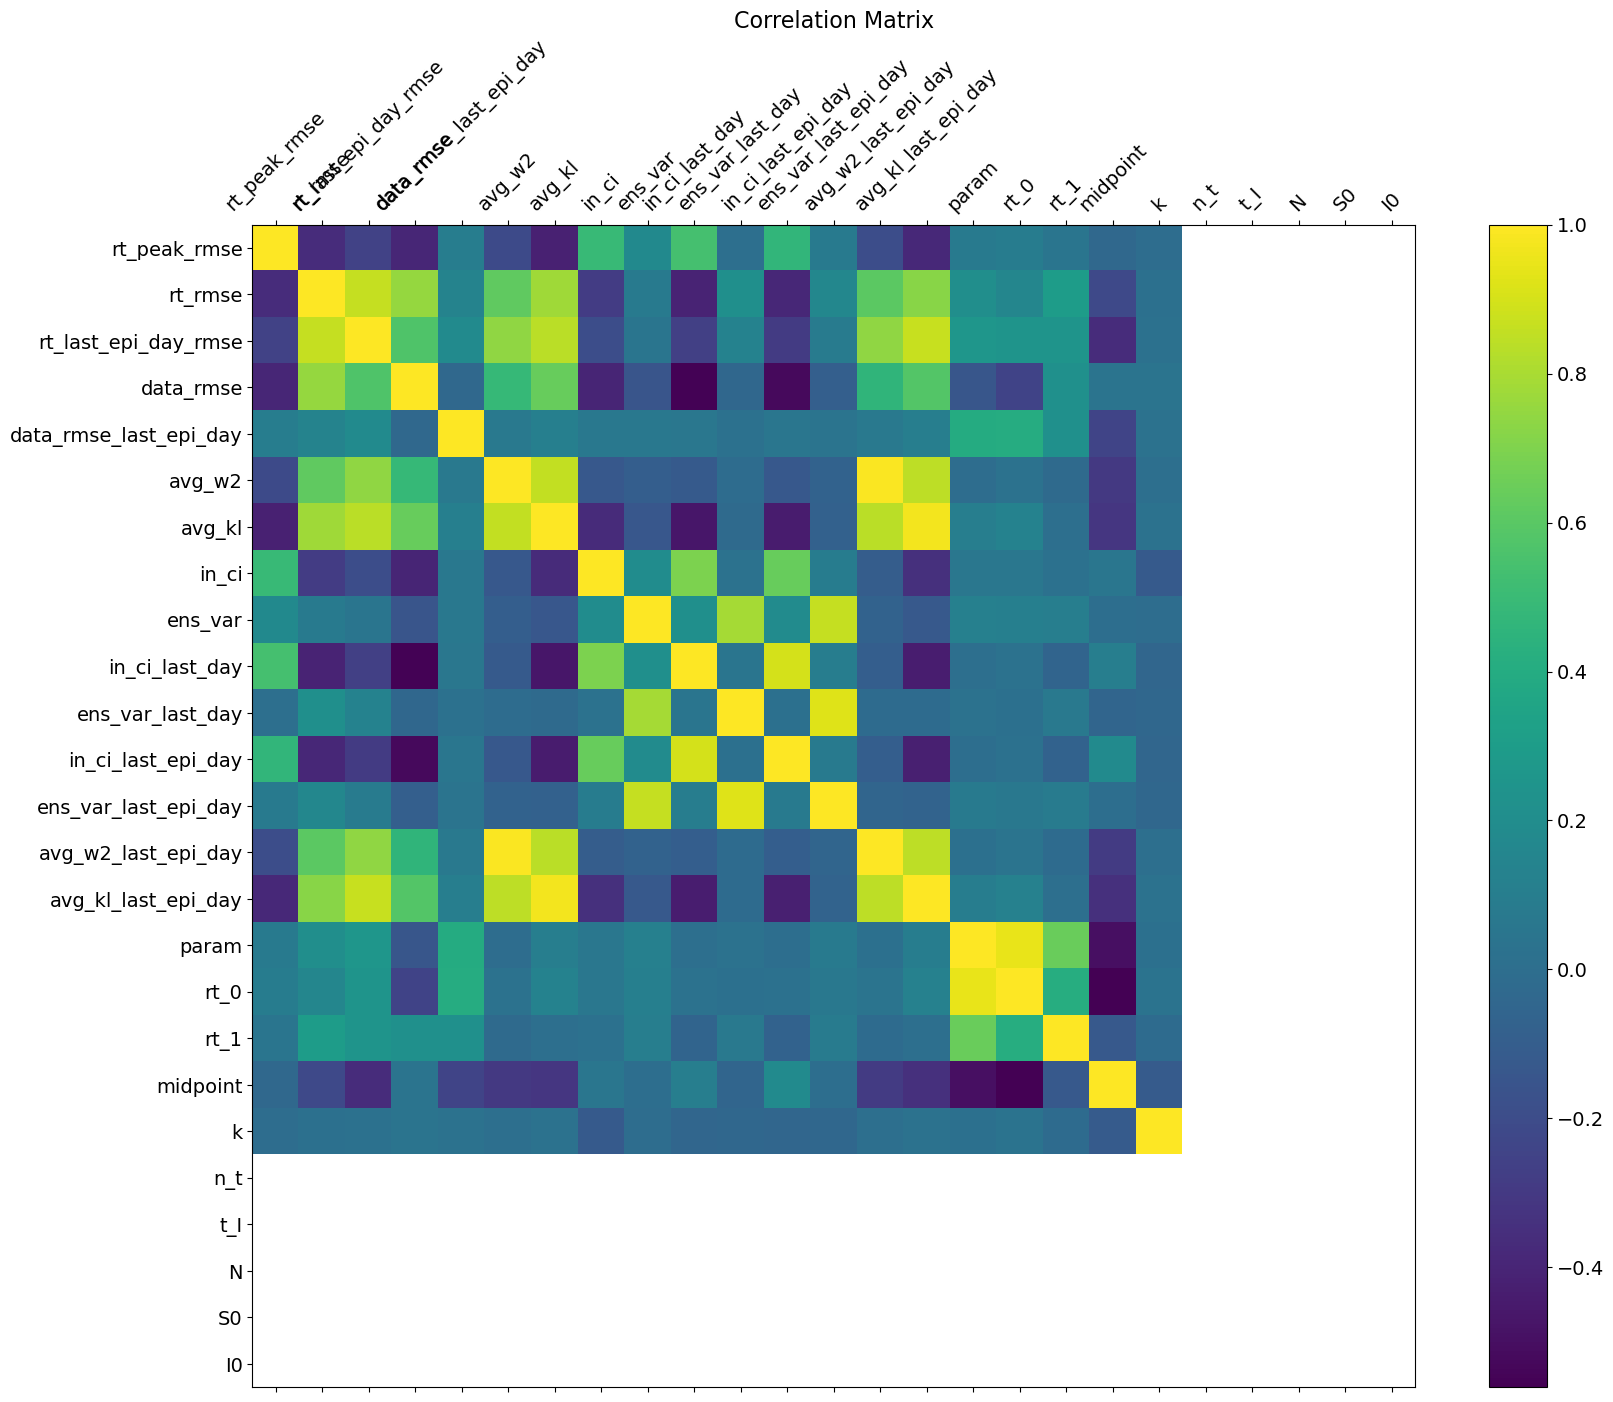

In [36]:
def plot_corr(df):
    f = plt.figure(figsize=(19, 15))
    plt.matshow(df.select_dtypes(['number']).corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)

plot_corr(eakf_metrics_badinciks_df)

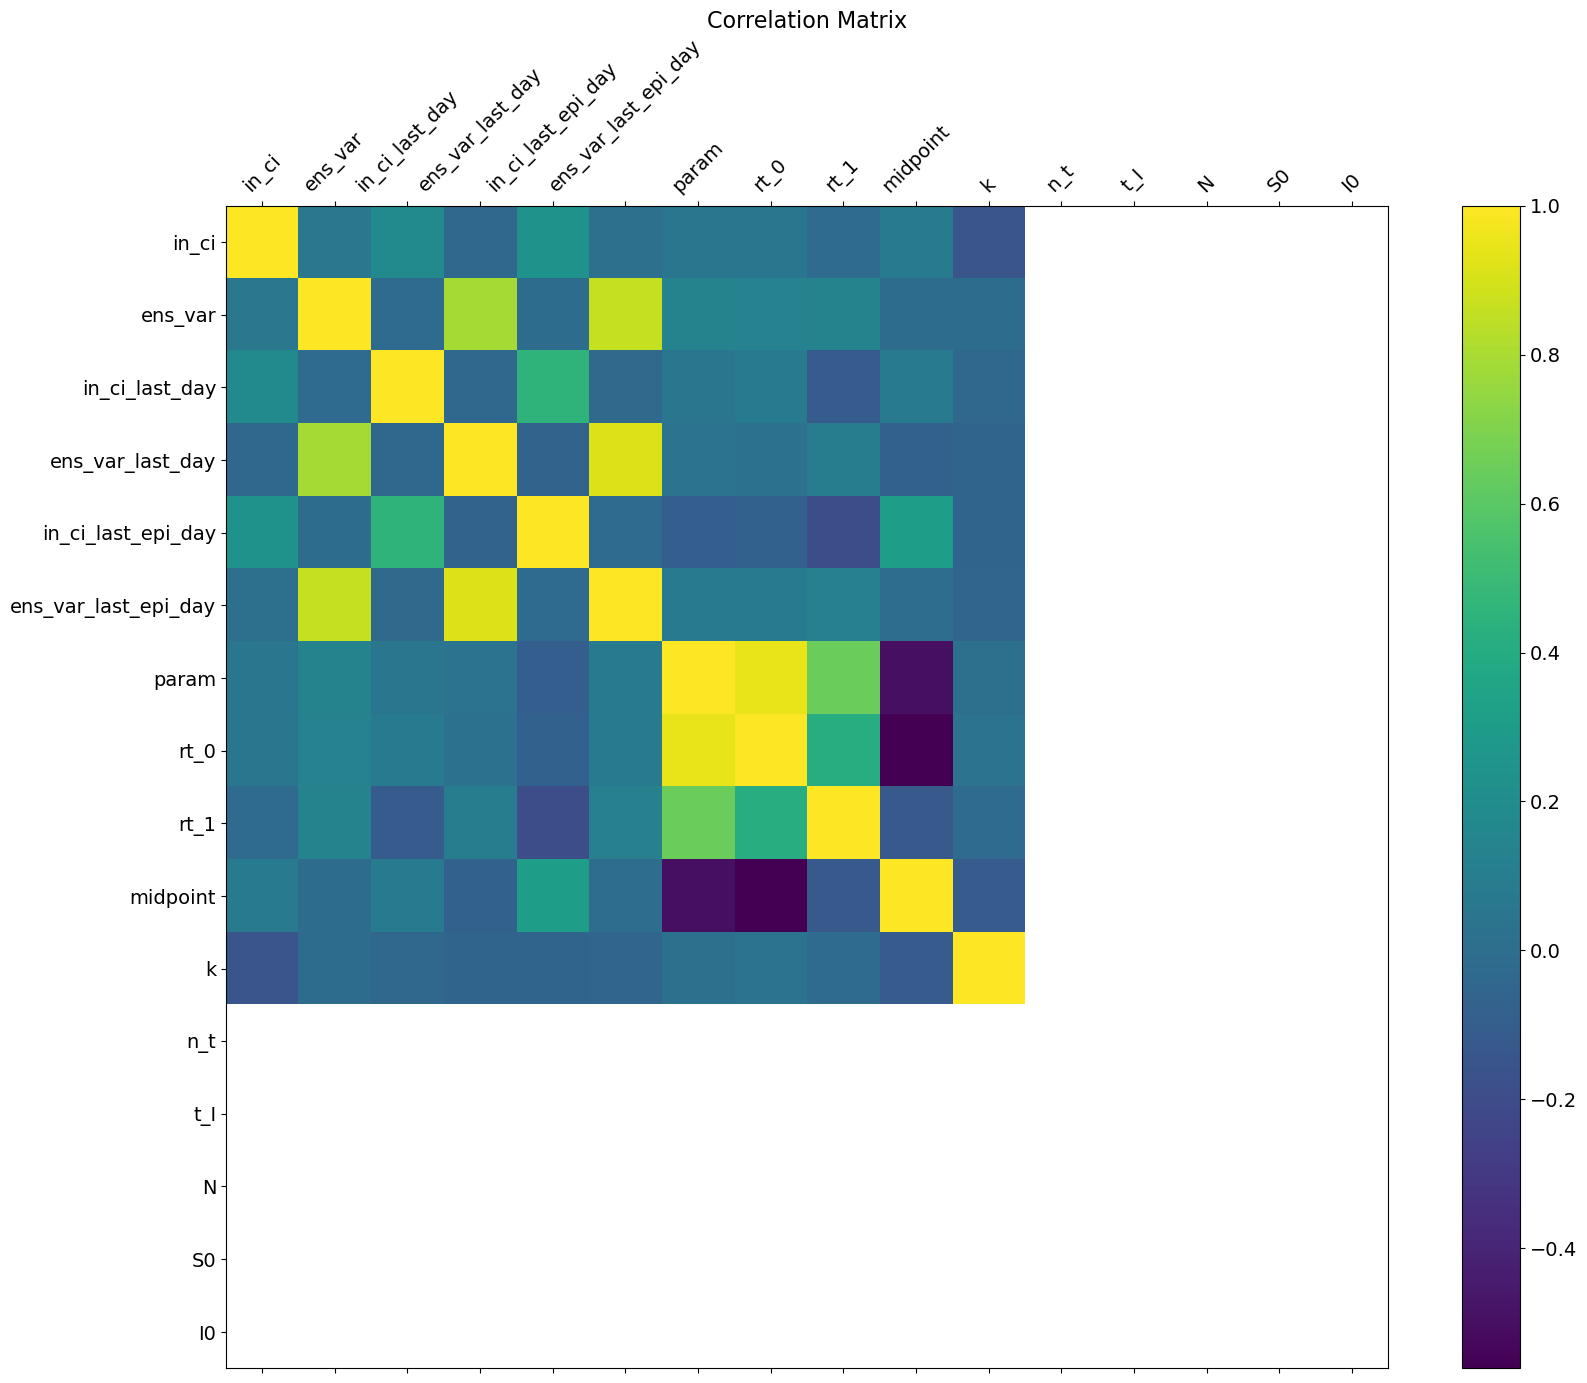

In [37]:
plot_corr(esrs_metrics_df)

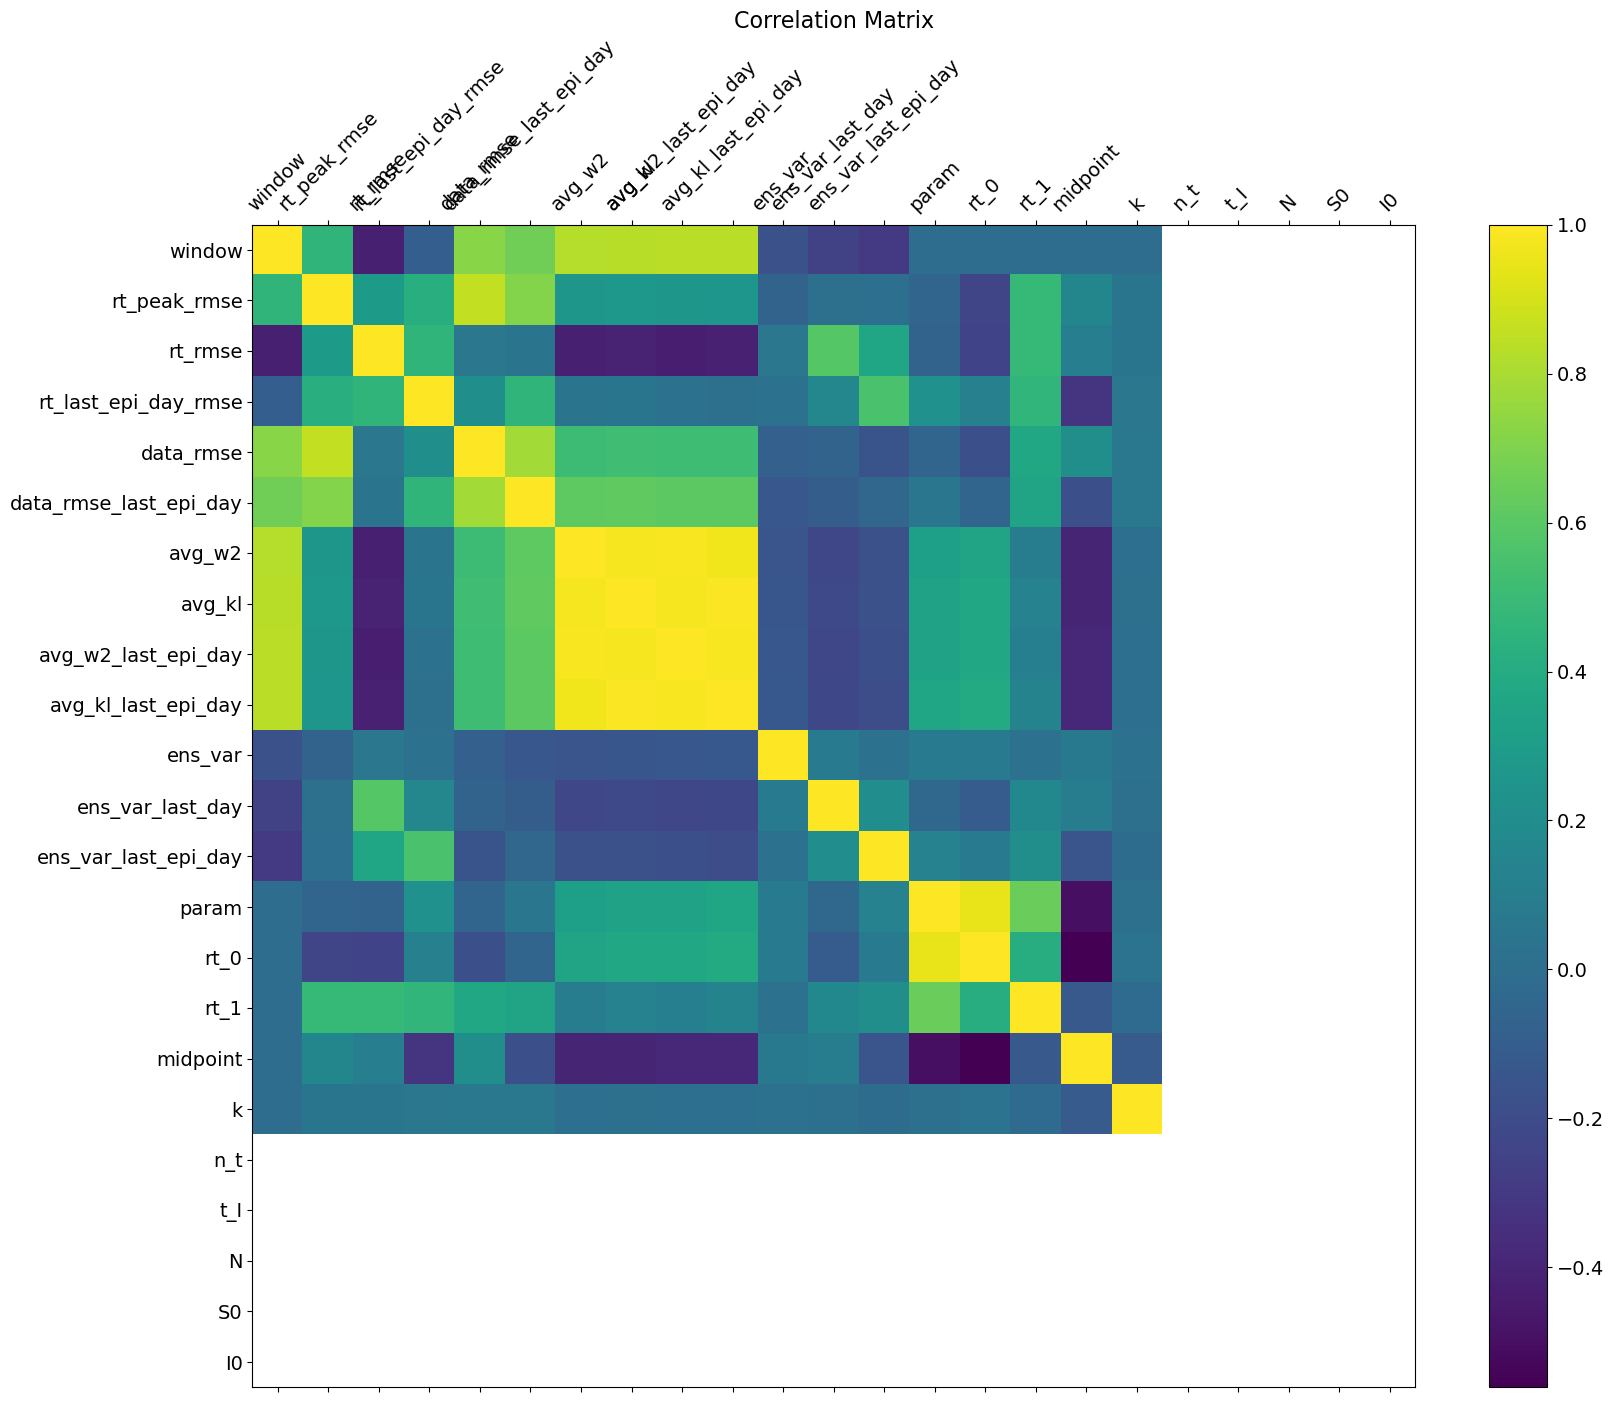

In [38]:
plot_corr(epiestim_metrics_df)

In [11]:
# move files
# files = glob.glob(dir + '/*epiEsim_plots.pdf')

# new_dir = "/ifs/scratch/jls106_gp/nhw2114/data/20231106_synthetic_data/pdf_archive/"
# for f in tqdm(files):
#     new_path = new_dir + os.path.basename(f)
#     os.rename(f, new_path)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47871/47871 [01:54<00:00, 418.94it/s]


In [ ]:
import seaborn as sns

_methods = ['adaptive inflation', 'fixed inflation', 'no inflation', 'smooth']
sns.relplot(data=eakf_metrics_df, x='in_ci_last_day', y='ens_var_last_day', hue='method', hue_order=_methods, aspect=1.61)
plt.show()

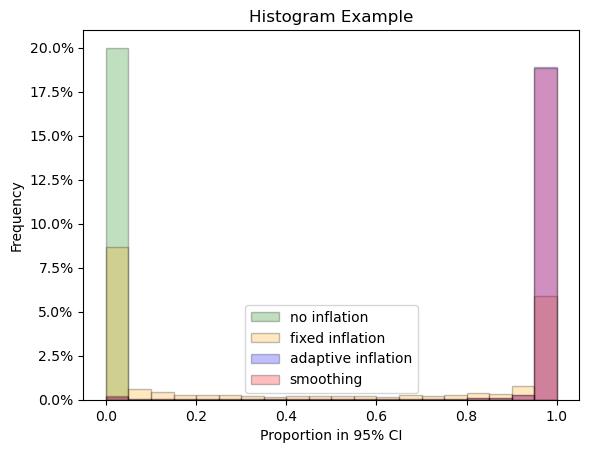

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
no_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "no inflation", "in_ci_last_day"]
fix_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "fixed inflation", "in_ci_last_day"]
adapt_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "adaptive inflation", "in_ci_last_day"]
smooth_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "smooth", "in_ci_last_day"]
ax.hist(no_ci, bins=20, color='green', label="no inflation", edgecolor='black', alpha=0.25, density=True, range=[0.0, 1.0])
ax.hist(fix_ci, bins=20, color='orange', label="fixed inflation", edgecolor='black', alpha=0.25, density=True)
ax.hist(adapt_ci, bins=20, color='blue', label="adaptive inflation", edgecolor='black', alpha=0.25, density=True) 
ax.hist(smooth_ci, bins=20, color='red', label="smoothing", edgecolor='black', alpha=0.25, density=True) 

ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('Histogram Example')
plt.xlabel('Proportion in 95% CI')
plt.ylabel('Frequency')
plt.legend()

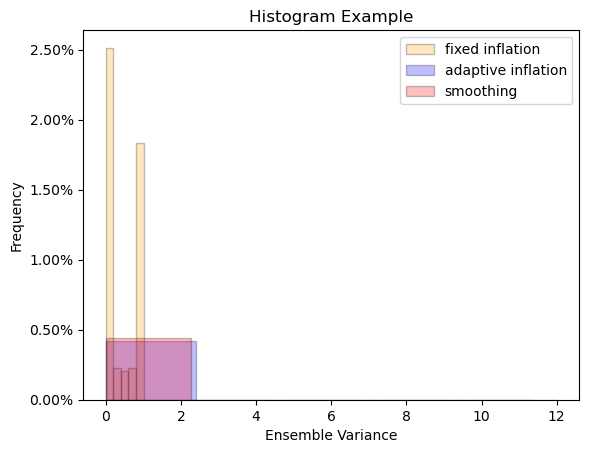

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
no_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "no inflation", "ens_var_last_day"]
# fix_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "fixed inflation", "ens_var_last_day"]
adapt_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "adaptive inflation", "ens_var_last_day"]
smooth_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "smooth", "ens_var_last_day"]

# ax.hist(no_ci, bins=5, color='green', label="no inflation", edgecolor='black', alpha=0.25, density=True, range=[0.0, 1.0])
ax.hist(fix_ci, bins=5, color='orange', label="fixed inflation", edgecolor='black', alpha=0.25, density=True)
ax.hist(adapt_ci, bins=5, color='blue', label="adaptive inflation", edgecolor='black', alpha=0.25, density=True) 
ax.hist(smooth_ci, bins=5, color='red', label="smoothing", edgecolor='black', alpha=0.25, density=True) 

# ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('Histogram Example')
plt.xlabel('Ensemble Variance')
plt.ylabel('Frequency')
plt.legend()

In [16]:
# from scipy.stats.kde import gaussian_kde

# x = eakf_metrics_df.loc[eakf_metrics_df["method"] == "adaptive inflation", "in_ci_last_day"]
# y = eakf_metrics_df.loc[eakf_metrics_df["method"] == "adaptive inflation", "ens_var_last_day"]
# Z, xedges, yedges = np.histogram2d(x, y,bins=5)
# plt.pcolormesh(xedges, yedges, Z.T)
# plt.colorbar()



# MISC

In [43]:
dir = "/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/pdf_archive"
len(os.listdir(dir))

218167

# Compute last day

In [56]:
import pickle
from epyfilter import simulate_data

good_param_df = pd.read_csv("good_param_list.csv")
pickle_list = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{param}_synthetic_data.pkl" for param in good_param_df.param]

def open_pickle(pickle_file):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

last_day_array = np.empty(shape=(len(pickle_list), 2))

In [60]:
for i, pp in enumerate(tqdm(pickle_list)):
    param = os.path.basename(pp).split("_")[0]
    data = open_pickle(pp)
    if len(np.where(data.i_true == 0)[0]) == 1:
        last_day = len(data.i_true)
    else:
        last_day = np.where(data.i_true == 0)[0][1]
    last_day_array[i] = [param, last_day]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47871/47871 [35:25<00:00, 22.52it/s]


In [66]:
last_day_df = pd.DataFrame(last_day_array, columns=['param','last_epidemic_day'], dtype=int)
last_day_df.to_csv("/ifs/scratch/jls106_gp/nhw2114/repos/rt-estimation/src/epyfilter/c2b2/last_epidemic_day.csv", index=False)

In [69]:
last_day_df[last_day_df.last_epidemic_day.isna()]

,param,last_epidemic_day


# COMPUTE LAST DAY, PEAKS, DATA DISTRIBUTION, AND 

In [36]:
import pickle
from epyfilter import simulate_data
from tqdm import tqdm

good_param_df = pd.read_csv("good_param_list.csv")
pickle_list = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{param}_synthetic_data.pkl" for param in good_param_df.param]

def compute_late_day(data):
    beta_1 = data.rt_1 / data.t_I
    beta_0 = data.rt_0 / data.t_I
    late_day = -1/data.k * np.log((beta_1 - beta_0)/(0.99*beta_1 - beta_0)-1) + data.midpoint
    late_day = int(late_day)
    return late_day

def compute_peaks(data):
    det_data = simulate_data.simulate_data(**data.true_params, run_deterministic=True)
    peak_days, = np.where(np.diff(np.sign(np.diff(det_data.i_true))) == -2)  # days where it increases before then decreases
    peak_days = peak_days[:2]  # just take first two days
    return peak_days

def open_pickle(pickle_file):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

In [37]:
data_files = glob.glob(dir + '/*_data_distribution.csv')
done_params = [int(os.path.basename(f).split("_")[0]) for f in data_files]
todo_params = list(set(good_param_df.param) - set(done_params))

pickle_list = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{param}_synthetic_data.pkl" for param in todo_params]

In [39]:
pickle_list = ["/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/71564_synthetic_data.pkl"]

In [40]:
for pp in tqdm(pickle_list):
    param = os.path.basename(pp).split("_")[0]
    data = open_pickle(pp)
    data_distribution_df = pd.DataFrame(data.data_distribution, columns=[f"sample{x}" for x in range(1,301)])
    data_distribution_df["day"] = range(len(data_distribution_df))
    data_distribution_df["late_day"] = compute_late_day(data)
    peaks = compute_peaks(data)
    data_distribution_df["peak1"] = peaks[0]
    data_distribution_df["peak2"] = peaks[1]
    
    data_distribution_df.to_csv(f"{dir}/{param}_data_distribution.csv", index=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


In [42]:
len(glob.glob(dir + '/*_data_distribution.csv'))

47871

# Fix Single Epidemics

In [7]:
pickles = glob.glob(dir + '/*.pkl')

In [8]:
import pickle
def open_pickle(pickle_file):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100185/100185 [3:04:18<00:00,  9.06it/s]


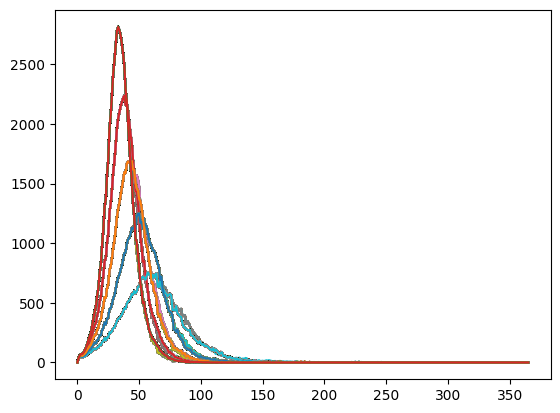

In [10]:
from tqdm import tqdm
from scipy.signal import find_peaks

bad_params = []
for file in tqdm(pickles):
    data = open_pickle(file)

    window_size = 10  # Adjust this window size as needed
    smoothed_data = np.convolve(data.i_true, np.ones(window_size) / window_size, mode='valid')
    peaks, _ = find_peaks(smoothed_data, height=100, prominence=10)
    if len(peaks) < 2:
        bad_params.append(file)
        plt.plot(data.i_true)

In [11]:
len(bad_params)

52314

In [14]:
pd.DataFrame(bad_params).to_csv("one_epidemic_curve.csv", index=False)

In [18]:
bad_metric_files = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{os.path.basename(b).split('_')[0]}_eakf_metrics.csv" for b in bad_params]

In [21]:
dfs = []
for file in tqdm(files):
    if file not in bad_metric_files:
        df = pd.read_csv(file)
        param = os.path.basename(file).split("_")[0]
        df["param"] = param
        dfs.append(df)

good_combined_df = pd.concat(dfs, ignore_index=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100185/100185 [07:22<00:00, 226.36it/s]


In [22]:
good_combined_df[["method", "rt_peak_rmse", "rt_rmse", "data_rmse", "avg_w2", "avg_kl", "in_ci"]].groupby("method").mean()

,rt_peak_rmse,rt_rmse,data_rmse,avg_w2,avg_kl,in_ci
method,,,,,,
adaptive inflation,0.084815,0.374231,47.154245,0.642203,0.952536,0.662593
fixed inflation,0.044096,0.599377,68.936821,0.811197,3.306851,0.172927
no inflation,0.024710,1.763012,117.320087,0.988873,7.159461,0.000000
smooth,0.043557,0.253248,58.496632,0.383990,0.968416,0.543410


Text(0, 0.5, 'Count')

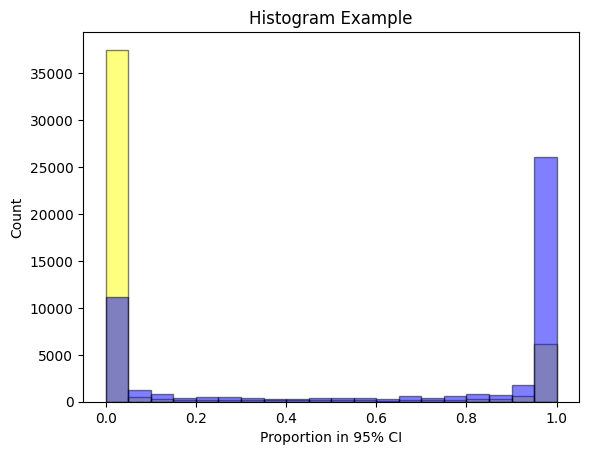

In [23]:
plt.hist(good_combined_df.loc[good_combined_df["method"] == "fixed inflation", "in_ci"], bins=20, color='yellow', edgecolor='black', alpha=0.5)
plt.hist(good_combined_df.loc[good_combined_df["method"] == "adaptive inflation", "in_ci"], bins=20, color='blue', edgecolor='black', alpha=0.5)
plt.title('Histogram Example')
plt.xlabel('Proportion in 95% CI')
plt.ylabel('Count')

In [42]:
pd.DataFrame(good_combined_df.param.unique(), columns=["param"]).to_csv("good_param_list.csv", index=False)

In [45]:
df = pd.read_csv("good_param_list.csv")
pickle_files = df.iloc[1:1000, 0]

In [46]:
pickle_files = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{p}_synthetic_data.pkl" for p in pickle_files]

In [51]:
4788/200 * 3

71.82000000000001

In [55]:
files = glob.glob(dir + '/*_for_epiestim.csv')

In [58]:
pd.read_csv(files[0])

,rt,i,prop_S
0,1.3,33.742320,0.99869
1,1.3,42.500996,0.99826
2,1.3,45.972273,0.99778
3,1.3,38.297496,0.99736
4,1.3,38.854358,0.99690
...,...,...,...
360,4.7,0.000000,0.58860
361,4.7,0.396479,0.58860
362,4.7,0.000000,0.58860
363,4.7,0.000000,0.58860
